## My codes for 100 knocks for image processing (Question 21 through 30)

[https://github.com/yoyoyo-yo/Gasyori100knock](https://github.com/yoyoyo-yo/Gasyori100knock)

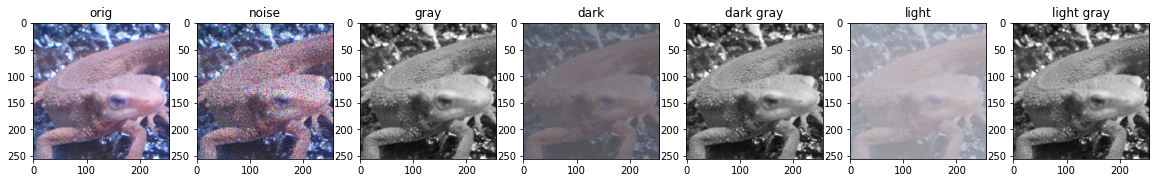

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('./dataset/images/imori_256x256.png')
img_noise = io.imread('./dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('./dataset/images/imori_256x256_dark.png')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('./dataset/images/imori_256x256_light.png')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray'); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray'); plt.title('light gray')
plt.show()


### Question No. 21 ヒストグラム正規化, Histogram normalization
濃度階調変換(gray-scale transformation)。今回はimori_256x256_dark.png、これをグレースケールしたものを[0, 255]のレンジにそれぞれ変換する。

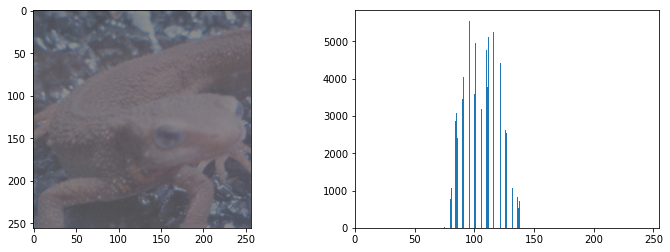

In [2]:
# 元々のヒストグラムはこれ　　明らかに画像は暗く、ヒストグラムも偏っている
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img_dark);
plt.subplot(1, 2, 2); plt.hist(img_dark.ravel(), bins=255);
plt.xlim([0, 255]); plt.show()

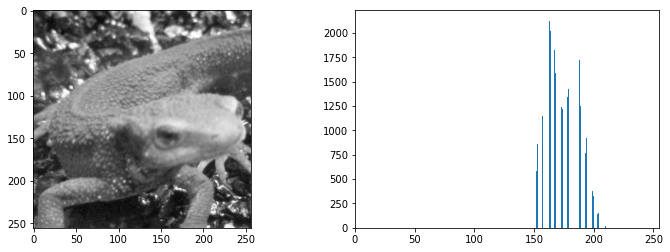

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img_light_gray, cmap='gray');
plt.subplot(1, 2, 2); plt.hist(img_light_gray.ravel(), bins=255);
plt.xlim([0, 255]); plt.show()

In [10]:
def gray_scale_transformation(img, new_range_min, new_range_max):
    cur_min_range, cur_max_range = img.min(), img.max()
    transformed_img = ((new_range_max - new_range_min) / (cur_max_range - cur_min_range)) * (img - cur_min_range) + new_range_min
    transformed_img[img < cur_min_range] = new_range_min
    transformed_img[img >= cur_max_range] = new_range_max
    return transformed_img.astype(np.uint8)

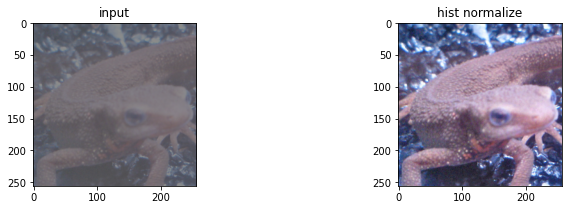

In [11]:
img_dark_scale_tf = gray_scale_transformation(img_dark, 0, 255)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_dark_scale_tf)
plt.show()

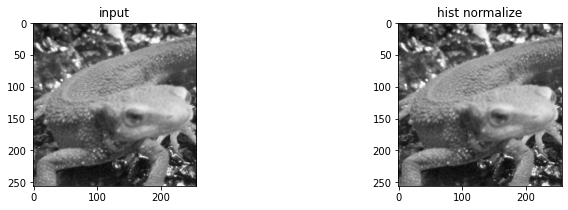

In [13]:
img_light_gray_scale_tf = gray_scale_transformation(img_light_gray, 0, 255)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_light_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_light_gray_scale_tf, cmap='gray')
plt.show()

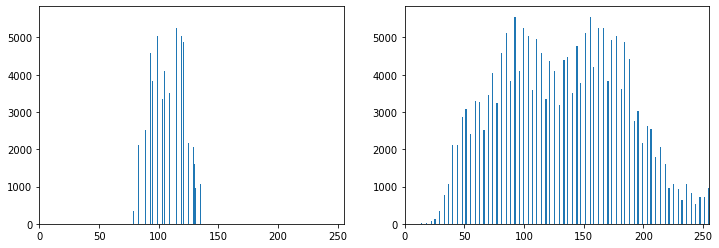

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_scale_tf.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

### Question No. 22 ヒストグラムのスケーリングとシフト, Histogram scaling and shift
ヒストグラムの平均値をm0=128、標準偏差をs0=50になるように操作せよ。

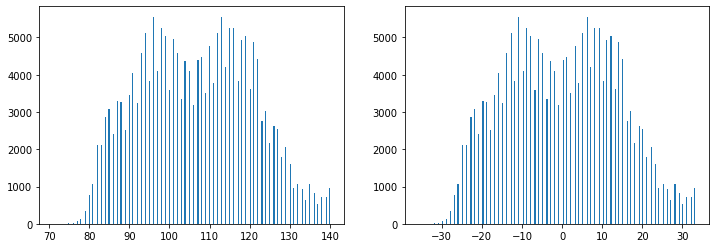

In [18]:
# 原理 1
# xin - m0 は画素の平均を0にする操作
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist((img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()


In [19]:
img_dark.std()

14.010876302431814

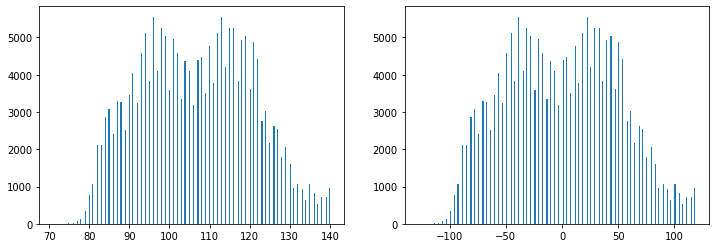

49.99999999999999

In [20]:
# 原理 2
# s / s0 は画素のstdを1にした後、希望の値にスケーリングする操作
# 標準化の式　[ (x - μ) / σ ] の式は（平均を0に、）標準偏差を１に変換するものだが、
# これに標準偏差を s に変換したいものだと考えればわかりやすい
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist( 50 / img_dark.std() * (img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()
(50 / img_dark.std() * (img_dark - img_dark.mean())).std()

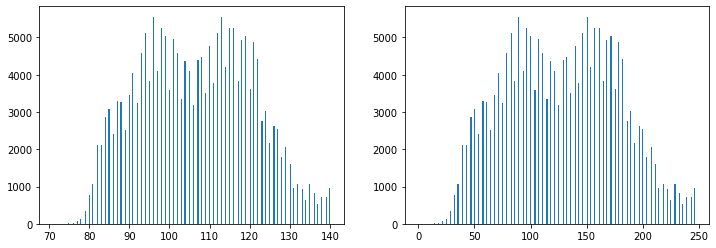

In [21]:
# 原理 3
# + m は希望のmeanにシフトする操作
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist( 50 / img_dark.std() * (img_dark - img_dark.mean()).ravel() + 128, bins=255)
plt.show()


In [22]:
# answer
def hist_scaleshift(img, m, s):
    m0, s0 = img.mean(), img.std()
    out = s / s0 * (img - m0) + m
    return np.clip(out, 0, 255).astype(np.uint8)


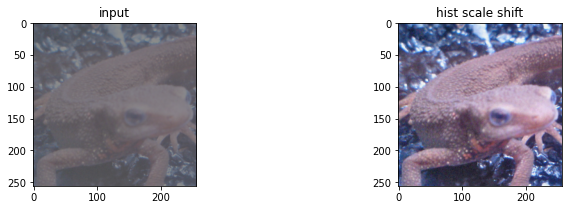

In [23]:
img_dark_hist_scaleshift = hist_scaleshift(img_dark, m=128, s=50) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist scale shift'); plt.imshow(img_dark_hist_scaleshift)
plt.show()


### Question No. 23 ヒストグラム平坦化, Histogram equalization
ヒストグラム平坦化を実装せよ。

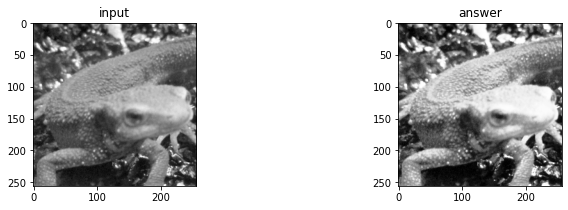

In [24]:
# opencv # opencvのは1チャンネルしか受け付けないらしい
img_dark_hist_equ = cv2.equalizeHist(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_hist_equ, cmap='gray')
plt.show()


In [27]:
# answer
def hist_equ(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255
    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)


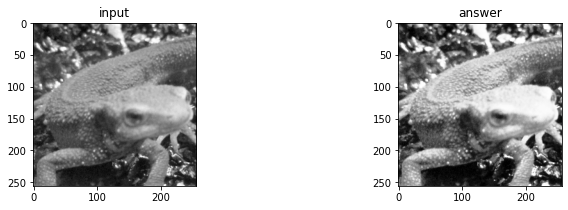

In [28]:
# グレースケール だと若干明るくなった？
img_dark_gray_hist_equ = hist_equ(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_gray_hist_equ, cmap='gray')
plt.show()


In [29]:
# RGB でやるなら、 RGBそれぞれでやるべきか？
def hist_equ_rgb(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.shape[0] * img.shape[1]
    x_max = 255

    for c in range(3):
        h = 0

        for i in range(256):
            h += (img[..., c] == i).sum()
            out[..., c][img[..., c] == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)


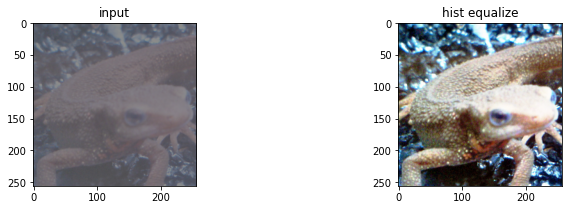

In [30]:
# RGBだと画像がめっちゃきれいになる
img_dark_hist_equ = hist_equ_rgb(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ)
plt.show()


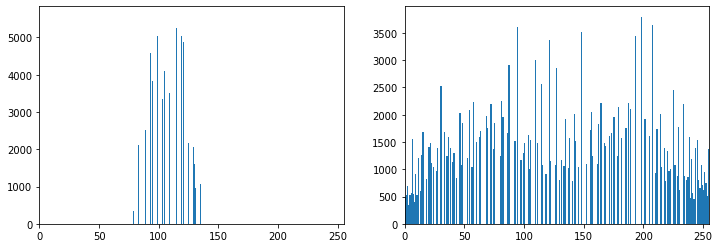

In [31]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ.ravel(), bins=255); plt.xlim([0, 255])
plt.show()


In [32]:
# RGB でやるなら、 RGBを一括でやるべきか？
def hist_equ_rgb_2(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255

    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)


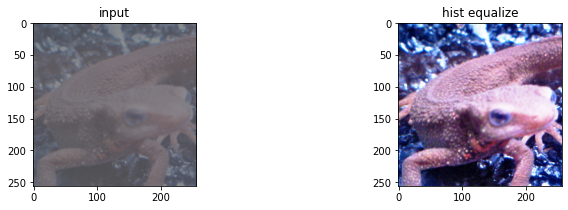

In [33]:
# RGBだと画像がめっちゃきれいになる
img_dark_hist_equ_2 = hist_equ_rgb_2(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ_2)
plt.show()


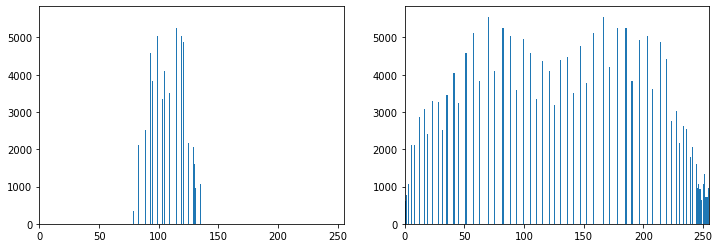

In [34]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ_2.ravel(), bins=255); plt.xlim([0, 255])
plt.show()


### Question No. 24 ガンマ補正, Gamma correction
imori_256x256_gamma.jpg に対してガンマ補正(c=1, g=2.2)を実行せよ。  
ガンマ補正とは、カメラなどの媒体の経由によって画素値が非線形的に変換された場合の補正である。 ディスプレイなどで画像をそのまま表示すると画面が暗くなってしまうため、RGBの値を予め大きくすることで、ディスプレイの特性を排除した画像表示を行うことがガンマ補正の目的である。

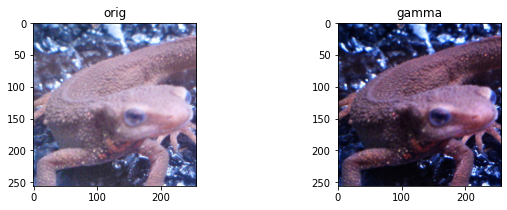

In [37]:
# この位変わるらしい
img_gamma = io.imread('./dataset/images/imori_256x256_gamma.png')
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_gamma); plt.title('gamma')
plt.show()

In [38]:
# answer 
def gamma_corr(img, c, g):
    out = (1 / c * (img / 255)) ** (1 / g)
    return np.clip(out * 255, 0, 255).astype(np.uint8)


In [39]:
# RGBだと画像がめっちゃきれいになる
img_gamma_corr = gamma_corr(img_gamma, c=1, g=2.2)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gamma)
plt.subplot(1, 3, 2); plt.title('gamma correction'); plt.imshow(img_gamma_corr)
plt.subplot(1, 3, 3); plt.title('orig'); plt.imshow(img_orig)
plt.show()


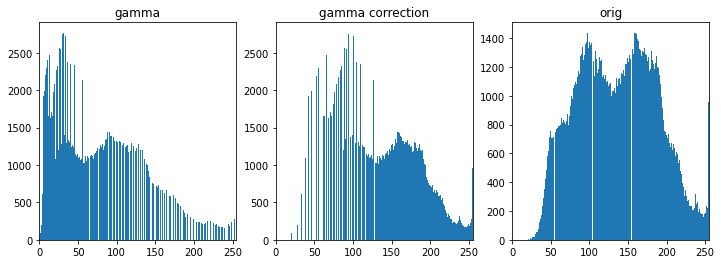

In [40]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_gamma.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma')
plt.subplot(1, 3, 2); plt.hist(img_gamma_corr.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma correction')
plt.subplot(1, 3, 3); plt.hist(img_orig.ravel(), bins=255); plt.xlim([0, 255]); plt.title('orig')
plt.show()


### Question No. 25 最近傍補間, Nearest nighbor interpolation (NN法)
最近傍補間により画像を1.5倍に拡大せよ。

最近傍補間(Nearest Neighbor)は画像の拡大時に最近傍にある画素をそのまま使う手法である。 シンプルで処理速度が速いが、画質の劣化は著しい。

画像が縦a倍、横b倍になったとすると、拡大後の画像のx, yはそれぞれ次式となる。拡大後x'の位置のピクセルは元画像のx/aの位置の画素値が当てはまることを意味する。

y' = round(y / a)
x' = round(x / a)

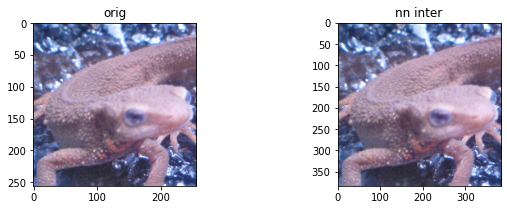

In [41]:
# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)), 
                    interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()


In [42]:
# answer
def nn_inter(img, a, b):
    out_h = int(img.shape[0] * a)
    out_w = int(img.shape[1] * b)
    out = np.zeros([out_h, out_w, img.shape[2]], dtype=np.uint8)

    xs, ys = np.meshgrid(range(out_h), range(out_w))
    out[ys, xs] = img[np.round(ys / a).astype(int), np.round(xs / b).astype(int)]
    return out


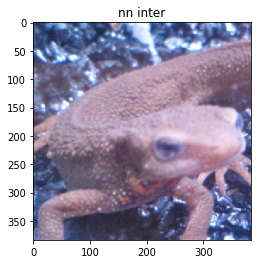

In [43]:
img_nn = nn_inter(img_orig, a=1.5, b=1.5)
plt.imshow(img_nn); plt.title('nn inter'); plt.show()


### Question No. 26 バイリニア補間, Bi-linear interpolation

Bi-linear補間により画像を1.5倍に拡大せよ。

Bi-linear補間とは周辺の４画素に距離に応じた重みをつけることで補完する手法である。 計算量が多いだけ処理時間がかかるが、画質の劣化を抑えることができる。 縦にa倍、横にb倍にする場合で考える。

拡大画像の座標(x', y')を拡大率で割り、x = floor(x'/b), y = floor(y'/a) を求める。
元画像の(x'/b, y'/a)の周囲4画素、I(x,y), I(x+1,y), I(x,y+1), I(x+1, y+1)を求める。
それぞれの画素と(x'/b, y'/a)との距離dを求め、重み付けする。

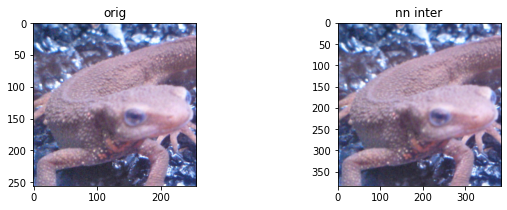

In [44]:
# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)),
                    interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()


### Question No. 27 Bi-cubic補間

Bi-cubic補間により画像を1.5倍に拡大せよ。

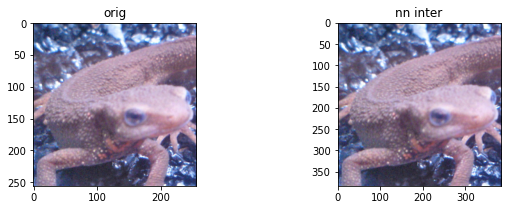

In [45]:
# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)),
                    interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()


### Question No. 28 アフィン変換(平行移動), Affine shift

アフィン変換を利用して画像をx方向に+30、y方向に-30だけ平行移動させよ。

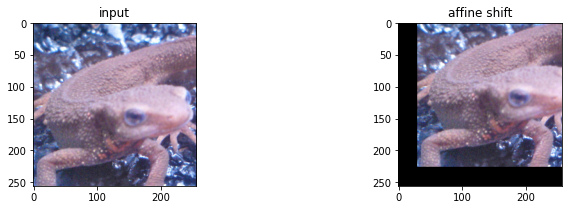

In [46]:
# opencv
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, np.array([[1, 0, 30], [0, 1, -30]], dtype=np.float32), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()


### Question No. 29 アフィン変換(拡大縮小), Affine scale

アフィン変換を用いて、(1)x方向に1.3倍、y方向に0.8倍にリサイズせよ。

また、(2) (1)の条件に加えて、x方向に+30、y方向に-30だけ平行移動を同時に実現せよ。

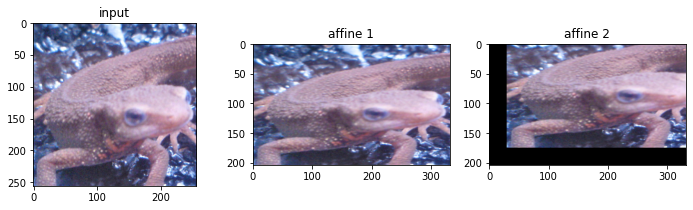

In [47]:
# opencv
h, w, c = img_orig.shape
img_affine_2_1 = cv2.warpAffine(img_orig, np.array([[1.3, 0, 0], [0, 0.8, 0]], dtype=np.float32), (int(w * 1.3), int(h * 0.8)))
img_affine_2_2 = cv2.warpAffine(img_orig, np.array([[1.3, 0, 30], [0, 0.8, -30]], dtype=np.float32), (int(w * 1.3), int(h * 0.8)))

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 3, 2); plt.title('affine 1'); plt.imshow(img_affine_2_1)
plt.subplot(1, 3, 3); plt.title('affine 2'); plt.imshow(img_affine_2_2)
plt.show()


### Question No. 30 30. アフィン変換(回転), Affine rotation

アフィン変換を利用して画像をx方向に+30、y方向に-30だけ平行移動させよ。

(1)アフィン変換を用いて、反時計方向に30度回転させよ。

(2) アフィン変換を用いて、反時計方向に30度回転した画像で中心座標を固定することで、なるべく黒い領域がなくなるように画像を作成せよ。 （ただし、単純なアフィン変換を行うと画像が切れてしまうので、工夫を要する。）

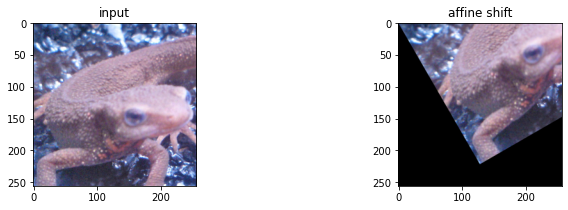

In [48]:
# opencv
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, cv2.getRotationMatrix2D((0,0), 30, 1.0), (h, w))
# cv2.warpAffine(img, matrix, size)
# cv2.getRotationMatrix2D(center point, angle degree, scale)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()


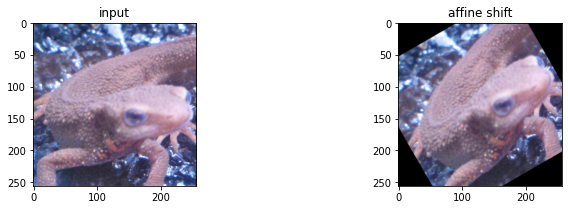

In [49]:
# opencv considering shift
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, cv2.getRotationMatrix2D((w / 2, h / 2), 30, 1.0), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()
